<a href="https://colab.research.google.com/github/ehpub/KFQ_MLDL_2023/blob/main/2023_kfq_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%EB%94%A5%EB%9F%AC%EB%8B%9D_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

강의 교재 : https://wikibook.co.kr/mymlrev/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Dense, LSTM, Dropout,Embedding
from keras import models
from keras.datasets import imdb
from keras.utils import pad_sequences

## 워드임베딩

In [24]:
(x_train,y_train),(x_test,y_test) = imdb.load_data(num_words=30000)

In [25]:
xseq_train = pad_sequences(x_train,maxlen=150)
xseq_test = pad_sequences(x_test,maxlen=150)

In [5]:
xseq_train.shape

(25000, 150)

In [10]:
em = Embedding(30000,16,input_length=150)
model = keras.Sequential()
model.add(em)
model.add(LSTM(20))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss=keras.losses.binary_crossentropy,
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 150, 16)           480000    
                                                                 
 lstm (LSTM)                 (None, 20)                2960      
                                                                 
 dense (Dense)               (None, 1)                 21        
                                                                 
Total params: 482,981
Trainable params: 482,981
Non-trainable params: 0
_________________________________________________________________


In [11]:
from keras.utils.tf_utils import validate_axis
es = keras.callbacks.EarlyStopping(patience=20,
                                   restore_best_weights=True)
hist = model.fit(xseq_train,y_train,callbacks=[es],
                 validation_split=0.2,
                 epochs=1000)

Epoch 1/1000
625/625 [==============================] - 40s 60ms/step - loss: 0.4713 - accuracy: 0.7652 - val_loss: 0.3328 - val_accuracy: 0.8604
Epoch 2/1000
625/625 [==============================] - 40s 64ms/step - loss: 0.2727 - accuracy: 0.8916 - val_loss: 0.3643 - val_accuracy: 0.8552
Epoch 3/1000
625/625 [==============================] - 36s 58ms/step - loss: 0.2159 - accuracy: 0.9176 - val_loss: 0.3052 - val_accuracy: 0.8746
Epoch 4/1000
625/625 [==============================] - 38s 60ms/step - loss: 0.1772 - accuracy: 0.9348 - val_loss: 0.3415 - val_accuracy: 0.8686
Epoch 5/1000
625/625 [==============================] - 35s 57ms/step - loss: 0.1542 - accuracy: 0.9471 - val_loss: 0.4223 - val_accuracy: 0.8354
Epoch 6/1000
625/625 [==============================] - 36s 57ms/step - loss: 0.1307 - accuracy: 0.9545 - val_loss: 0.3525 - val_accuracy: 0.8710
Epoch 7/1000
625/625 [==============================] - 36s 57ms/step - loss: 0.1160 - accuracy: 0.9607 - val_loss: 0.4078 -

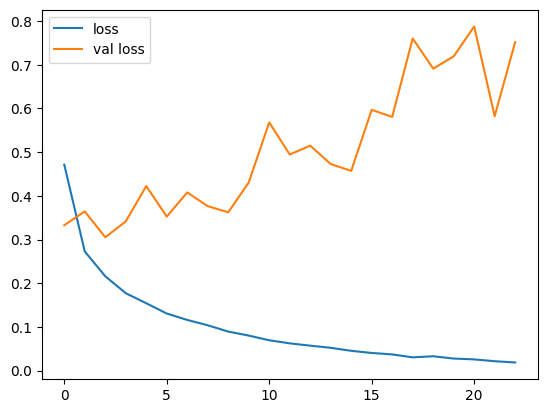

In [12]:
plt.plot(hist.history['loss'],label='loss')
plt.plot(hist.history['val_loss'],label='val loss')
plt.legend()
plt.show()

In [26]:
em = Embedding(30000,16,input_length=150)
model = keras.Sequential()
model.add(em)
model.add(LSTM(20))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss=keras.losses.binary_crossentropy,
              metrics=['accuracy'])
model.summary()
es = keras.callbacks.EarlyStopping(patience=20,
                                   restore_best_weights=True)
hist = model.fit(xseq_train,y_train,callbacks=[es],
                 validation_split=0.2,
                 epochs=1000)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 150, 16)           480000    
                                                                 
 lstm_2 (LSTM)               (None, 20)                2960      
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 482,981
Trainable params: 482,981
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
625/625 [==============================] - 45s 69ms/step - loss: 0.4863 - accuracy: 0.7567 - val_loss: 0.3494 - val_accuracy: 0.8482
Epoch 2/1000
625/625 [============

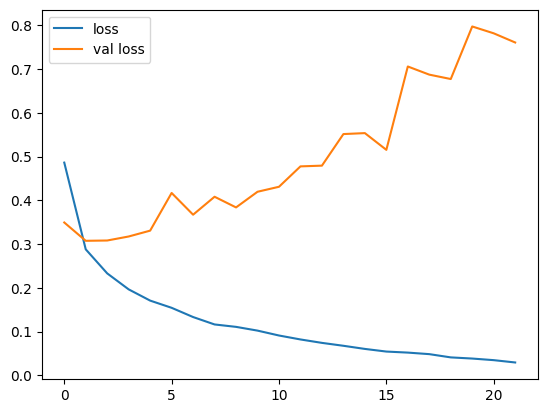

In [27]:
plt.plot(hist.history['loss'],label='loss')
plt.plot(hist.history['val_loss'],label='val loss')
plt.legend()
plt.show()

## 시계열 데이터 예측

In [7]:
path = '/content/drive/MyDrive/mldata/iap.csv'

In [8]:
df = pd.read_csv(path,header=None)
df.columns = ['date','passenger']
df

,date,passenger
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


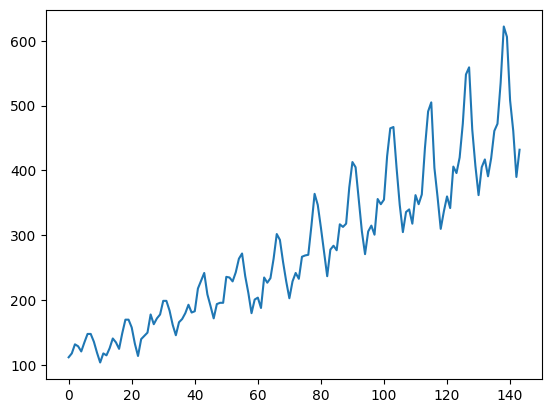

In [9]:
plt.plot(df['passenger'])
plt.show()

In [10]:
x = []
y = []
src = df['passenger']
n = len(src)
for i in range(n-12):
  x.append(src[i:i+12])
  y.append(src[i+12])
x = np.array(x)
y = np.array(y)
x.shape, y.shape

((132, 12), (132,))

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y)

In [21]:
x_train.shape

(99, 12)

In [13]:
model = keras.Sequential()
model.add(Input(shape=(12,1)))
model.add(LSTM(10))
model.add(Dense(5,activation='relu'))
model.add(Dense(1,activation='relu'))
model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10)                480       
                                                                 
 dense (Dense)               (None, 5)                 55        
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 541
Trainable params: 541
Non-trainable params: 0
_________________________________________________________________


In [14]:
es = keras.callbacks.EarlyStopping(patience=20,
                                   restore_best_weights=True)
hist = model.fit(x_train,y_train,
                 validation_split=0.2,
                 epochs=10000,callbacks=[es])

Epoch 1/10000
3/3 [==============================] - 5s 335ms/step - loss: 103441.8828 - accuracy: 0.0000e+00 - val_loss: 96645.1562 - val_accuracy: 0.0000e+00
Epoch 2/10000
3/3 [==============================] - 0s 33ms/step - loss: 103409.3203 - accuracy: 0.0000e+00 - val_loss: 96582.4062 - val_accuracy: 0.0000e+00
Epoch 3/10000
3/3 [==============================] - 0s 36ms/step - loss: 103330.9141 - accuracy: 0.0000e+00 - val_loss: 96518.7578 - val_accuracy: 0.0000e+00
Epoch 4/10000
3/3 [==============================] - 0s 25ms/step - loss: 103273.8984 - accuracy: 0.0000e+00 - val_loss: 96496.4062 - val_accuracy: 0.0000e+00
Epoch 5/10000
3/3 [==============================] - 0s 25ms/step - loss: 103254.8828 - accuracy: 0.0000e+00 - val_loss: 96480.2031 - val_accuracy: 0.0000e+00
Epoch 6/10000
3/3 [==============================] - 0s 33ms/step - loss: 103237.8516 - accuracy: 0.0000e+00 - val_loss: 96463.9297 - val_accuracy: 0.0000e+00
Epoch 7/10000
3/3 [==========================

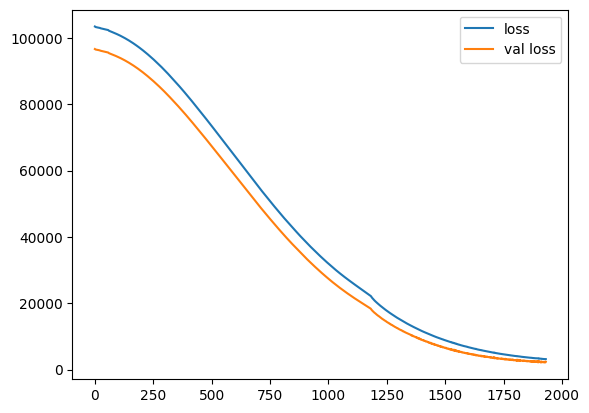

In [15]:
plt.plot(hist.history['loss'],label='loss')
plt.plot(hist.history['val_loss'],label='val loss')
plt.legend()
plt.show()

In [21]:
pred = model.predict(x_test)

2/2 [==============================] - 0s 5ms/step


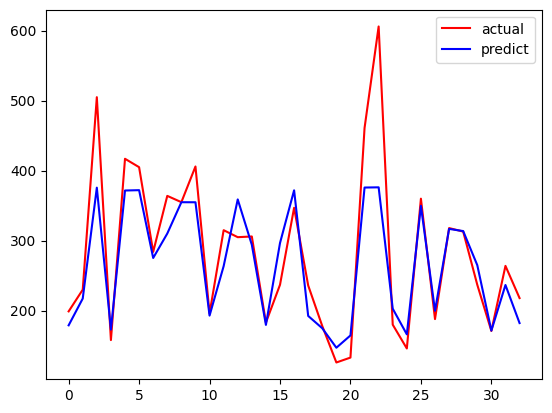

In [22]:
plt.plot(y_test,'r',label='actual')
plt.plot(pred,'b',label='predict')
plt.legend()
plt.show()

5/5 [==============================] - 0s 6ms/step


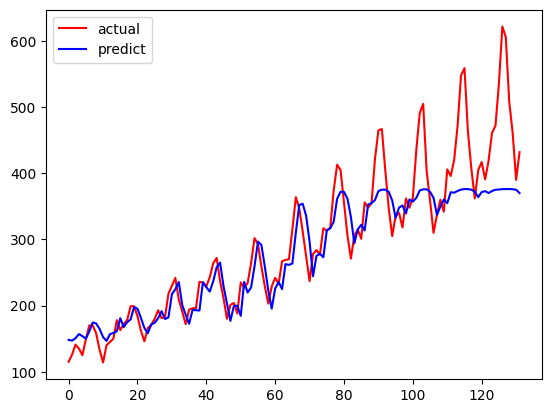

In [19]:
pred = model.predict(x)
plt.plot(y,'r',label='actual')
plt.plot(pred,'b',label='predict')
plt.legend()
plt.show()

In [29]:
path = '/content/drive/MyDrive/mldata/000080.csv'
df = pd.read_csv(path)
df.shape

(250, 11)

In [30]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volumn', 'AdjOpen', 'AdjHigh',
       'AdjLow', 'AdjClose', 'AdjVolumn'],
      dtype='object')

In [31]:
df.describe()

,Open,High,Low,Close,Volumn,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolumn
count,250.000000,250.000000,0.0,0.0,0.0,0.0,250.000000,0.0,0.0,0.0
mean,32907.800000,33560.600000,NaN,NaN,NaN,NaN,32749.746237,NaN,NaN,NaN
std,6304.649362,6379.377986,NaN,NaN,NaN,NaN,6405.017730,NaN,NaN,NaN
min,21800.000000,22850.000000,NaN,NaN,NaN,NaN,21700.000000,NaN,NaN,NaN
25%,28012.500000,28500.000000,NaN,NaN,NaN,NaN,27555.913950,NaN,NaN,NaN
50%,29750.000000,30375.000000,NaN,NaN,NaN,NaN,29618.638000,NaN,NaN,NaN
75%,37775.000000,38500.000000,NaN,NaN,NaN,NaN,37987.500000,NaN,NaN,NaN
max,46000.000000,47050.000000,NaN,NaN,NaN,NaN,46500.000000,NaN,NaN,NaN


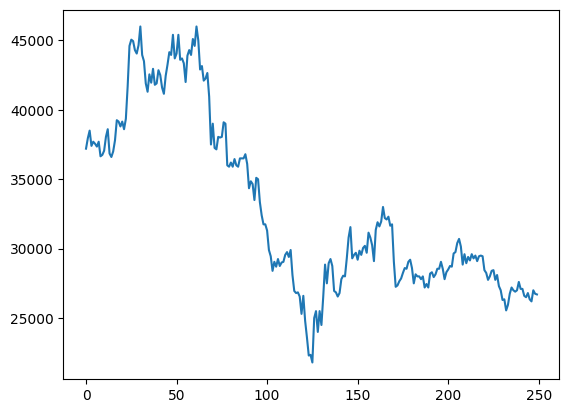

In [32]:
src = df['Open']
plt.plot(src)
plt.show()

In [60]:
x = []
y = []
period = 20
n = len(src)
for i in range(n-period):
  x.append(src[i:i+period])
  y.append(src[i+period])
x = np.array(x)
y = np.array(y)
x.shape, y.shape

((230, 20), (230,))

In [40]:
model = keras.Sequential()
model.add(Input(shape=(5,1)))
model.add(LSTM(3))
model.add(Dense(1,activation='relu'))
model.compile(optimizer='adam',
              loss='mse')
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 3)                 60        
                                                                 
 dense_6 (Dense)             (None, 1)                 4         
                                                                 
Total params: 64
Trainable params: 64
Non-trainable params: 0
_________________________________________________________________


In [35]:
x_train,x_test,y_train,y_test = train_test_split(x,y)

In [41]:
es = keras.callbacks.EarlyStopping(patience=50,
                                   restore_best_weights=True)
hist = model.fit(x_train,y_train,
                 validation_split=0.2,
                 epochs=10000,callbacks=[es])

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
5/5 [==============================] - 0s 27ms/step - loss: 1095348224.0000 - val_loss: 1086906112.0000
Epoch 7502/10000
5/5 [==============================] - 0s 22ms/step - loss: 1095347456.0000 - val_loss: 1086905216.0000
Epoch 7503/10000
5/5 [==============================] - 0s 33ms/step - loss: 1095346560.0000 - val_loss: 1086904448.0000
Epoch 7504/10000
5/5 [==============================] - 0s 26ms/step - loss: 1095345792.0000 - val_loss: 1086903680.0000
Epoch 7505/10000
5/5 [==============================] - 0s 32ms/step - loss: 1095344896.0000 - val_loss: 1086902912.0000
Epoch 7506/10000
5/5 [==============================] - 0s 28ms/step - loss: 1095344256.0000 - val_loss: 1086902016.0000
Epoch 7507/10000
5/5 [==============================] - 0s 28ms/step - loss: 1095343360.0000 - val_loss: 1086901120.0000
Epoch 7508/10000
5/5 [==============================] - 0s 26ms/step - loss: 1095342464.0000 - val_loss: 1086900352.0000
Epoch 7509/10

In [54]:
nx = x/np.max(x)

In [69]:
model = keras.Sequential()
model.add(Input(shape=(20,1)))
model.add(LSTM(16,activation='relu'))
#model.add(Dense(5,activation='relu'))
model.add(Dense(1,activation='relu'))
model.compile(loss='mae')
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_17 (LSTM)              (None, 16)                1152      
                                                                 
 dense_21 (Dense)            (None, 1)                 17        
                                                                 
Total params: 1,169
Trainable params: 1,169
Non-trainable params: 0
_________________________________________________________________


In [70]:
es = keras.callbacks.EarlyStopping(patience=50,
                                   restore_best_weights=True)
hist = model.fit(x,y,
                 validation_split=0.2,
                 epochs=10000,callbacks=[es])

Epoch 1/10000
6/6 [==============================] - 3s 224ms/step - loss: 16215.2090 - val_loss: 8804.3789
Epoch 2/10000
6/6 [==============================] - 0s 20ms/step - loss: 9292.9521 - val_loss: 4627.1968
Epoch 3/10000
6/6 [==============================] - 0s 20ms/step - loss: 4015.7856 - val_loss: 2101.1829
Epoch 4/10000
6/6 [==============================] - 0s 20ms/step - loss: 5940.0552 - val_loss: 4908.3882
Epoch 5/10000
6/6 [==============================] - 0s 22ms/step - loss: 4927.6982 - val_loss: 2520.6626
Epoch 6/10000
6/6 [==============================] - 0s 20ms/step - loss: 5251.6235 - val_loss: 7919.0264
Epoch 7/10000
6/6 [==============================] - 0s 23ms/step - loss: 7261.1543 - val_loss: 6165.2202
Epoch 8/10000
6/6 [==============================] - 0s 23ms/step - loss: 5498.9023 - val_loss: 5465.3647
Epoch 9/10000
6/6 [==============================] - 0s 19ms/step - loss: 4967.0420 - val_loss: 3805.4485
Epoch 10/10000
6/6 [========================

8/8 [==============================] - 0s 4ms/step


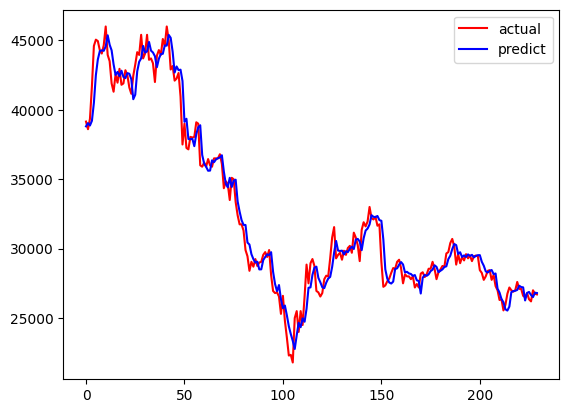

In [71]:
pred = model.predict(x)
plt.plot(y,'r',label='actual')
plt.plot(pred,'b',label='predict')
plt.legend()
plt.show()

In [2]:
path = '/content/drive/MyDrive/mldata/coin2020.csv'
df = pd.read_csv(path)
df

,candle_date_time_kst,opening_price,high_price,low_price,trade_price
0,2019-12-31T00:00:00,8402000.0,8406000.0,8367000.0,8379000.0
1,2019-12-31T00:15:00,8379000.0,8379000.0,8360000.0,8365000.0
2,2019-12-31T00:30:00,8365000.0,8378000.0,8362000.0,8376000.0
3,2019-12-31T00:45:00,8377000.0,8383000.0,8354000.0,8359000.0
4,2019-12-31T01:00:00,8366000.0,8378000.0,8359000.0,8364000.0
...,...,...,...,...,...
123739,2023-07-11T10:00:00,40074000.0,40108000.0,40043000.0,40098000.0
123740,2023-07-11T10:15:00,40097000.0,40108000.0,40052000.0,40087000.0
123741,2023-07-11T10:30:00,40098000.0,40188000.0,40088000.0,40142000.0
123742,2023-07-11T10:45:00,40142000.0,40233000.0,40142000.0,40224000.0


In [3]:
src = df['trade_price']

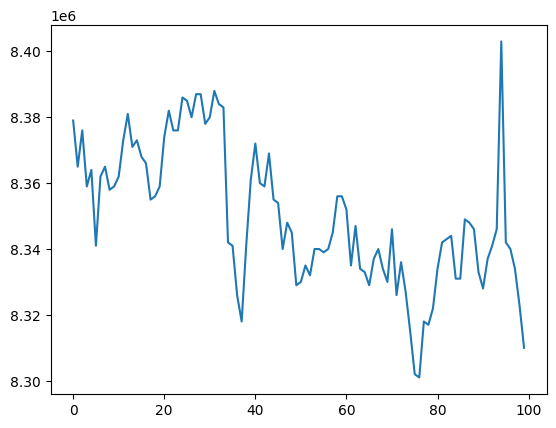

In [75]:
plt.plot(src[:100])
plt.show()

In [7]:
x = []
y = []
period = 96
n = len(src)
for i in range(n-period):
  x.append(src[i:i+period])
  y.append(src[i+period])
x = np.array(x)
y = np.array(y)
x = x/np.max(x)
x.shape, y.shape

((123648, 96), (123648,))

In [8]:
x[0]

array([0.10131924, 0.10114995, 0.10128297, 0.1010774 , 0.10113786,
       0.10085974, 0.10111368, 0.10114995, 0.10106531, 0.1010774 ,
       0.10111368, 0.10124669, 0.10134343, 0.10122251, 0.10124669,
       0.10118623, 0.10116205, 0.10102903, 0.10104113, 0.1010774 ,
       0.10125878, 0.10135552, 0.10128297, 0.10128297, 0.10140389,
       0.10139179, 0.10133133, 0.10141598, 0.10141598, 0.10130715,
       0.10133133, 0.10142807, 0.1013797 , 0.10136761, 0.10087184,
       0.10085974, 0.10067836, 0.10058163, 0.10085974, 0.10110159,
       0.1012346 , 0.10108949, 0.1010774 , 0.10119832, 0.10102903,
       0.10101694, 0.10084765, 0.10094439, 0.10090811, 0.10071464,
       0.10072673, 0.10078719, 0.10075092, 0.10084765, 0.10084765,
       0.10083556, 0.10084765, 0.10090811, 0.10104113, 0.10104113,
       0.10099276, 0.10078719, 0.1009323 , 0.1007751 , 0.10076301,
       0.10071464, 0.10081138, 0.10084765, 0.1007751 , 0.10072673,
       0.1009202 , 0.10067836, 0.10079928, 0.10069046, 0.10054

In [32]:
from keras import backend as K

In [33]:
def r2_score(y_true, y_pred):
    u = K.sum(K.square(y_true - y_pred))
    v = K.sum(K.square(y_true - K.mean(y_true)))
    return K.ones_like(v) - (u / v)

In [40]:
model = keras.Sequential()
model.add(Input(shape=(period,1)))
model.add(LSTM(16,activation='relu'))
#model.add(Dense(50,activation='relu'))
model.add(Dense(1,activation='relu'))
model.compile(loss='mse',metrics=[r2_score])
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_15 (LSTM)              (None, 16)                1152      
                                                                 
 dense_14 (Dense)            (None, 1)                 17        
                                                                 
Total params: 1,169
Trainable params: 1,169
Non-trainable params: 0
_________________________________________________________________


In [41]:
es = keras.callbacks.EarlyStopping(patience=20,
                                   restore_best_weights=True)
hist = model.fit(x,y,
                 validation_split=0.2,
                 epochs=10000,callbacks=[es])

Epoch 1/10000
3092/3092 [==============================] - 138s 44ms/step - loss: 1738051126558720.0000 - r2_score: -3.1003 - val_loss: 1016600035590144.0000 - val_r2_score: -324248.0312
Epoch 2/10000
3092/3092 [==============================] - 132s 43ms/step - loss: 1738052066082816.0000 - r2_score: -3.0962 - val_loss: 1016600035590144.0000 - val_r2_score: -324248.0312
Epoch 3/10000
3092/3092 [==============================] - 133s 43ms/step - loss: 1738050992340992.0000 - r2_score: -3.1020 - val_loss: 1016600035590144.0000 - val_r2_score: -324248.0312
Epoch 4/10000
3092/3092 [==============================] - 131s 42ms/step - loss: 1738052602953728.0000 - r2_score: -3.1054 - val_loss: 1016600035590144.0000 - val_r2_score: -324248.0312
Epoch 5/10000
3092/3092 [==============================] - 134s 43ms/step - loss: 1738050455470080.0000 - r2_score: -3.0980 - val_loss: 1016600035590144.0000 - val_r2_score: -324248.0312
Epoch 6/10000
3092/3092 [==============================] - 125s 4

KeyboardInterrupt: ignored